In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Basic Pt1000 PTC RTD sensor characteristic

In [2]:
A = 3.9083e-3
B = -5.775e-7
R0 = 1000
def Rt (t):
    return R0 * (1 + A*t + B*t**2)

Lets plot resistance vs. temperature plot

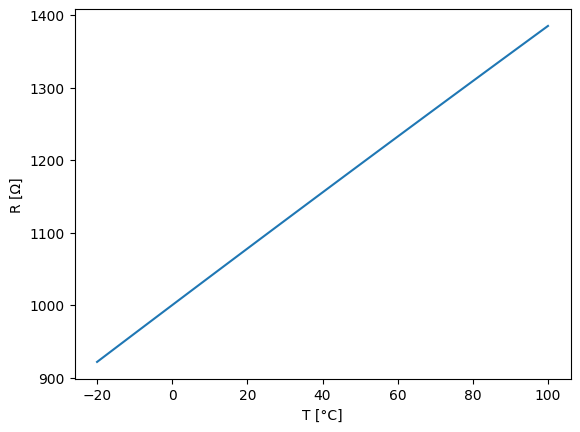

In [3]:
t_min = -20
t_max = 100

t = np.linspace(t_min, t_max, num=t_max-t_min+1)
Rs = Rt(t)

fig, ax = plt.subplots()
ax.plot(t, Rs)
ax.set_xlabel("T [°C]")
ax.set_ylabel("R [Ω]")
plt.show()

For my sensor I planned to use Wheatstone bridge and INA333 instrumentation amplifier.

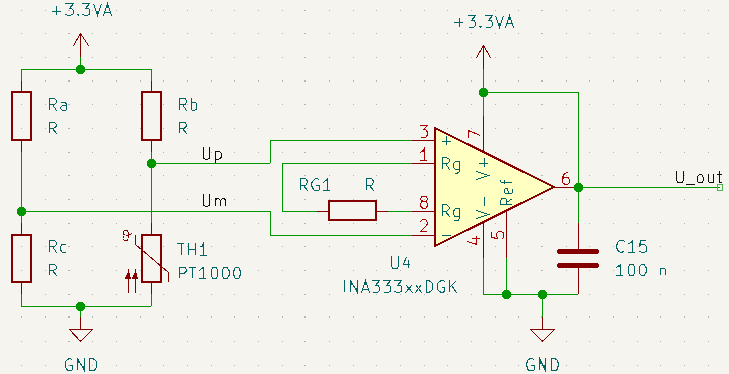

With Ra and Rb being over 22 kOhm, i should get excitation current of about 150uA, which should be OK.

Better version would probably use constant current source. I didn't feel like building my own using opamps.
I considered usinf REF200, which would increase this device cost and LM334, which has quite significant thermal drift.
So I will try this and hope my resistors will not thermal drift.

All of the resistors should be widely available.

With Rg2700.0 the INA gain should be 38.03703703703704


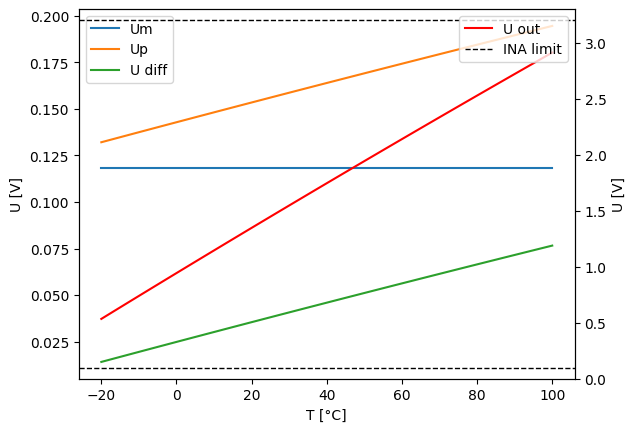

In [4]:
Ra = 22.1e3
Rb = 22.1e3
Rc = 820

Ua = 3.3

Rg = 2.7e3
gain = 1+(100e3/Rg)

print(f"With Rg{Rg} the INA gain should be {gain}")

Um = np.ones_like(t)*Rc*Ua/(Ra + Rc)
Up = Rs * Ua / (Rb + Rs)

fig, ax = plt.subplots()
ax.plot(t, Um, label = "Um")
ax.plot(t, Up, label = "Up")
ax.plot(t, Up - Um, label = "U diff")
ax.legend()
ax.set_xlabel("T [°C]")
ax.set_ylabel("U [V]")
ax2= ax.twinx()
ax2.plot(t, (Up - Um) * gain, label = "U out", color="red")
ax2.axhline(y= 0.1, linewidth=1, color='black', linestyle="dashed", label = "INA limit")
ax2.axhline(y= Ua-0.1, linewidth=1, color='black', linestyle="dashed")
ax2.legend(loc='upper right')
ax2.set_ylabel("U [V]")
ax2.set_ylim(0, Ua)
plt.show()

## 